In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import datetime as dt

In [9]:
ticker = 'GOOG'
start = dt.datetime(2010,1,1)
end = dt.datetime.now()

In [10]:
data = yf.download(tickers = ticker, start = start,end = end)
data.info()

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3498 entries, 2010-01-04 to 2023-11-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3498 non-null   float64
 1   High       3498 non-null   float64
 2   Low        3498 non-null   float64
 3   Close      3498 non-null   float64
 4   Adj Close  3498 non-null   float64
 5   Volume     3498 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 191.3 KB


In [11]:
# Adding indicators

data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)


macd_result = ta.macd(data.Close, fastperiod=12, slowperiod=26, signalperiod=9)
data['MACD'] = macd_result['MACD_12_26_9']




data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i]>0 else 0 for i in range(len(data))]

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

In [12]:
data.head()

,Open,High,Low,Adj Close,RSI,EMAF,MACD,Target,TargetClass,TargetNextClose
0,13.438131,13.487695,13.326798,13.360920,31.664460,13.871763,-0.621646,0.009464,1,13.311356
1,13.301891,13.394544,13.142987,13.311356,30.863446,13.818391,-0.589485,0.076714,1,13.359924
2,13.283211,13.461792,13.188068,13.359924,32.652165,13.774727,-0.553696,0.003736,1,13.278230
3,13.274494,13.378604,13.212975,13.278230,31.197529,13.727442,-0.525863,0.110336,1,13.481966
4,13.371630,13.552452,13.307620,13.481966,38.516341,13.704063,-0.481811,-0.094396,0,13.405005


In [13]:
data_set = data.iloc[:, 0:10]#.values
pd.set_option('display.max_columns', None)

data_set.head(20)


,Open,High,Low,Adj Close,RSI,EMAF,MACD,Target,TargetClass,TargetNextClose
0,13.438131,13.487695,13.326798,13.360920,31.664460,13.871763,-0.621646,0.009464,1,13.311356
1,13.301891,13.394544,13.142987,13.311356,30.863446,13.818391,-0.589485,0.076714,1,13.359924
2,13.283211,13.461792,13.188068,13.359924,32.652165,13.774727,-0.553696,0.003736,1,13.278230
3,13.274494,13.378604,13.212975,13.278230,31.197529,13.727442,-0.525863,0.110336,1,13.481966
4,13.371630,13.552452,13.307620,13.481966,38.516341,13.704063,-0.481811,-0.094396,0,13.405005
5,13.499401,13.534270,13.390061,13.405005,36.926556,13.675581,-0.447946,0.141470,1,13.529787
6,13.388317,13.574370,13.353448,13.529787,41.146541,13.661696,-0.406355,0.005730,1,13.468517
7,13.462788,13.549961,13.442116,13.468517,39.747492,13.643298,-0.374026,-0.113325,0,13.519326
8,13.632651,13.636387,13.474494,13.519326,41.514367,13.631491,-0.340381,-0.197510,0,13.326798
9,13.524308,13.539999,13.257557,13.326798,37.097703,13.602473,-0.325501,-0.062516,0,13.237134


In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.01788833 0.01752133 0.01816508 ... 0.46031729 1.         0.01752128]
 [0.01692172 0.01686108 0.01684352 ... 0.46505282 1.         0.01786858]
 [0.01678919 0.01733773 0.01716765 ... 0.45991388 1.         0.01728441]
 ...
 [0.88390293 0.90307211 0.89648588 ... 0.50753431 1.         0.91355609]
 [0.90121446 0.90689956 0.91241112 ... 0.52443493 1.         0.92356703]
 [0.90944455 0.92203243 0.92172181 ... 0.36670012 0.         0.91069588]]


In [15]:
X = []

backcandles = 60
print(data_set_scaled.shape[0])
for j in range(7):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])


X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

print(X)
print(X.shape)
print(y)
print(y.shape)

3472
[[[0.01788833 0.01752133 0.01816508 ... 0.12629518 0.01665212 0.44115016]
  [0.01692172 0.01686108 0.01684352 ... 0.11388455 0.01625861 0.44431409]
  [0.01678919 0.01733773 0.01716765 ... 0.14159834 0.01593668 0.44783499]
  ...
  [0.01558403 0.01600135 0.01637615 ... 0.21286203 0.01485614 0.47900478]
  [0.01558756 0.01491035 0.01263891 ... 0.07854923 0.01414259 0.47405918]
  [0.01107439 0.0129649  0.01196918 ... 0.11584818 0.01355628 0.47116896]]

 [[0.01692172 0.01686108 0.01684352 ... 0.11388455 0.01625861 0.44431409]
  [0.01678919 0.01733773 0.01716765 ... 0.14159834 0.01593668 0.44783499]
  [0.01672734 0.0167481  0.01734671 ... 0.11906071 0.01558805 0.45057316]
  ...
  [0.01558756 0.01491035 0.01263891 ... 0.07854923 0.01414259 0.47405918]
  [0.01107439 0.0129649  0.01196918 ... 0.11584818 0.01355628 0.47116896]
  [0.01244743 0.01328267 0.00472213 ... 0.06511296 0.01283185 0.4670917 ]]

 [[0.01678919 0.01733773 0.01716765 ... 0.14159834 0.01593668 0.44783499]
  [0.01672734 0.0

In [17]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2729
(2729, 60, 7)
(683, 60, 7)
(2729, 1)
(683, 1)
[[0.01016405]
 [0.01524163]
 [0.01299759]
 ...
 [0.64604063]
 [0.65624098]
 [0.65707403]]


In [18]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 7), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)



Epoch 1/30

164/164 [==============================] - 5s 19ms/step - loss: 0.0014 - val_loss: 6.0813e-04
Epoch 2/30
164/164 [==============================] - 3s 17ms/step - loss: 4.5224e-05 - val_loss: 5.3479e-04
Epoch 3/30
164/164 [==============================] - 3s 17ms/step - loss: 4.9934e-05 - val_loss: 4.9139e-04
Epoch 4/30
164/164 [==============================] - 3s 18ms/step - loss: 4.3851e-05 - val_loss: 8.2961e-04
Epoch 5/30
164/164 [==============================] - 3s 17ms/step - loss: 4.8022e-05 - val_loss: 7.4035e-04
Epoch 6/30
164/164 [==============================] - 3s 17ms/step - loss: 4.4663e-05 - val_loss: 4.3711e-04
Epoch 7/30
164/164 [==============================] - 3s 17ms/step - loss: 4.0277e-05 - val_loss: 3.8379e-04
Epoch 8/30
164/164 [==============================] - 3s 17ms/step - loss: 4.7985e-05 - val_loss: 4.3628e-04
Epoch 9/30
164/164 [==============================] - 3s 17ms/step - loss: 4.3639e-05 - val_loss: 3.9519e-04
Epoch 10/30
164/164 

In [19]:
y_pred = model.predict(X_test)

for i in range(10):
    print(y_pred[i], y_test[i])

22/22 [==============================] - 1s 8ms/step
[0.65830547] [0.67843294]
[0.65893495] [0.65953741]
[0.6702615] [0.66117133]
[0.6615377] [0.67047785]
[0.6599366] [0.66996302]
[0.6658135] [0.65034883]
[0.6661885] [0.65284445]
[0.65468] [0.65119618]
[0.6528303] [0.65633394]
[0.65162116] [0.65350942]


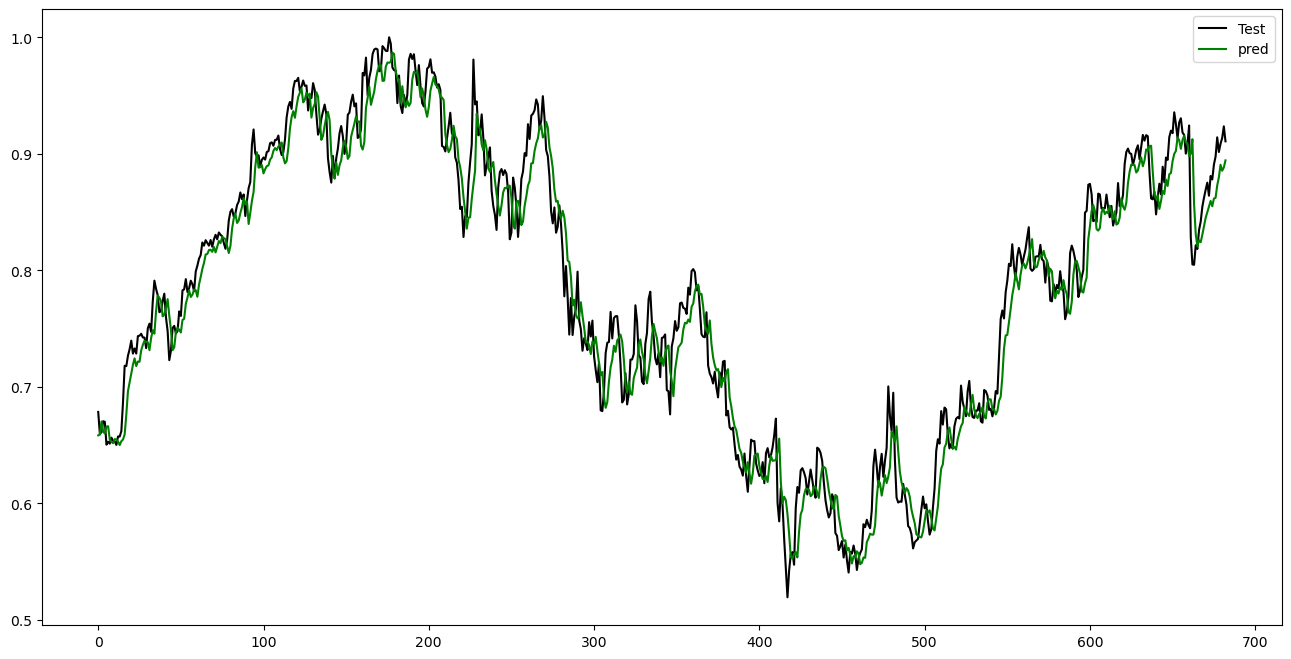

In [20]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()